# Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [184]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/Air_Quality.csv")

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [186]:
df.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


In [187]:
df.columns = df.columns.str.lower().str.strip()

In [188]:
# Revisar duplicados.
df[df.duplicated()]

,date,city,co,co2,no2,so2,o3,pm2.5,pm10,aqi


In [189]:
# Verificar valores nulos
print(df.isnull().sum())

date         0
city         0
co           0
co2      43056
no2          0
so2          0
o3           0
pm2.5        0
pm10         0
aqi          0
dtype: int64


In [190]:
df.describe()

,co,co2,no2,so2,o3,pm2.5,pm10,aqi
count,52704.000000,9648.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,462.348259,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,159.589953,33.769009,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,445.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,453.000000,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,306.000000,467.000000,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330


In [191]:
# Comenzamos viendo los null de country, city y district.
df[df["co2"].isna()]

,date,city,co,co2,no2,so2,o3,pm2.5,pm10,aqi
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...,...,...,...
51091,2024-10-25 19:00:00+00:00,Sydney,111.0,NaN,7.9,3.8,42.0,5.5,9.5,16.800000
51092,2024-10-25 20:00:00+00:00,Sydney,117.0,NaN,8.2,4.4,42.0,5.9,10.0,16.800000
51093,2024-10-25 21:00:00+00:00,Sydney,120.0,NaN,7.9,4.6,44.0,6.5,10.9,17.600000
51094,2024-10-25 22:00:00+00:00,Sydney,117.0,NaN,6.3,4.0,49.0,5.8,10.4,19.600000


In [192]:
df.drop(['co2'], inplace=True, axis=1)
df

,date,city,co,no2,so2,o3,pm2.5,pm10,aqi
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,11.8,10.7,53.0,11.6,15.7,21.199999


In [193]:
df.dtypes

,0
date,object
city,object
co,float64
no2,float64
so2,float64
o3,float64
pm2.5,float64
pm10,float64
aqi,float64


In [194]:
df_1 = df

# Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
# Se eliminaran las columnas de CO sobre 800 ya que sobre ese nivel es letal.
# Eliminamos Outlinear y vemos el tamaño de la data.
df_1 = df_1[df_1["co"] < 800]
df_1

,date,city,co,no2,so2,o3,pm2.5,pm10,aqi
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,11.8,10.7,53.0,11.6,15.7,21.199999


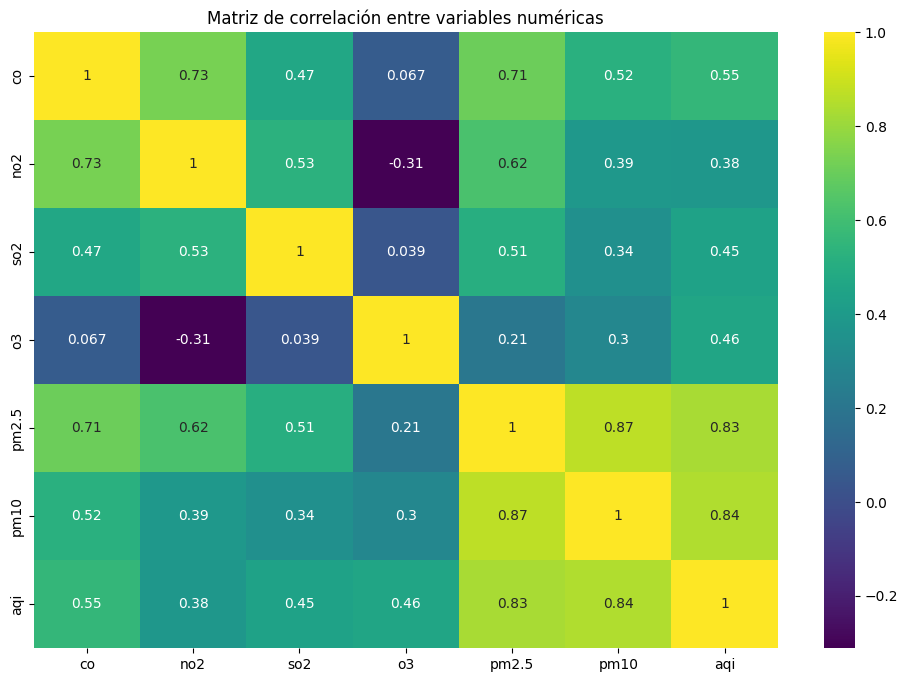

In [209]:
# Correlación numérica generadas con las columnas númericas
num_df = df_1.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

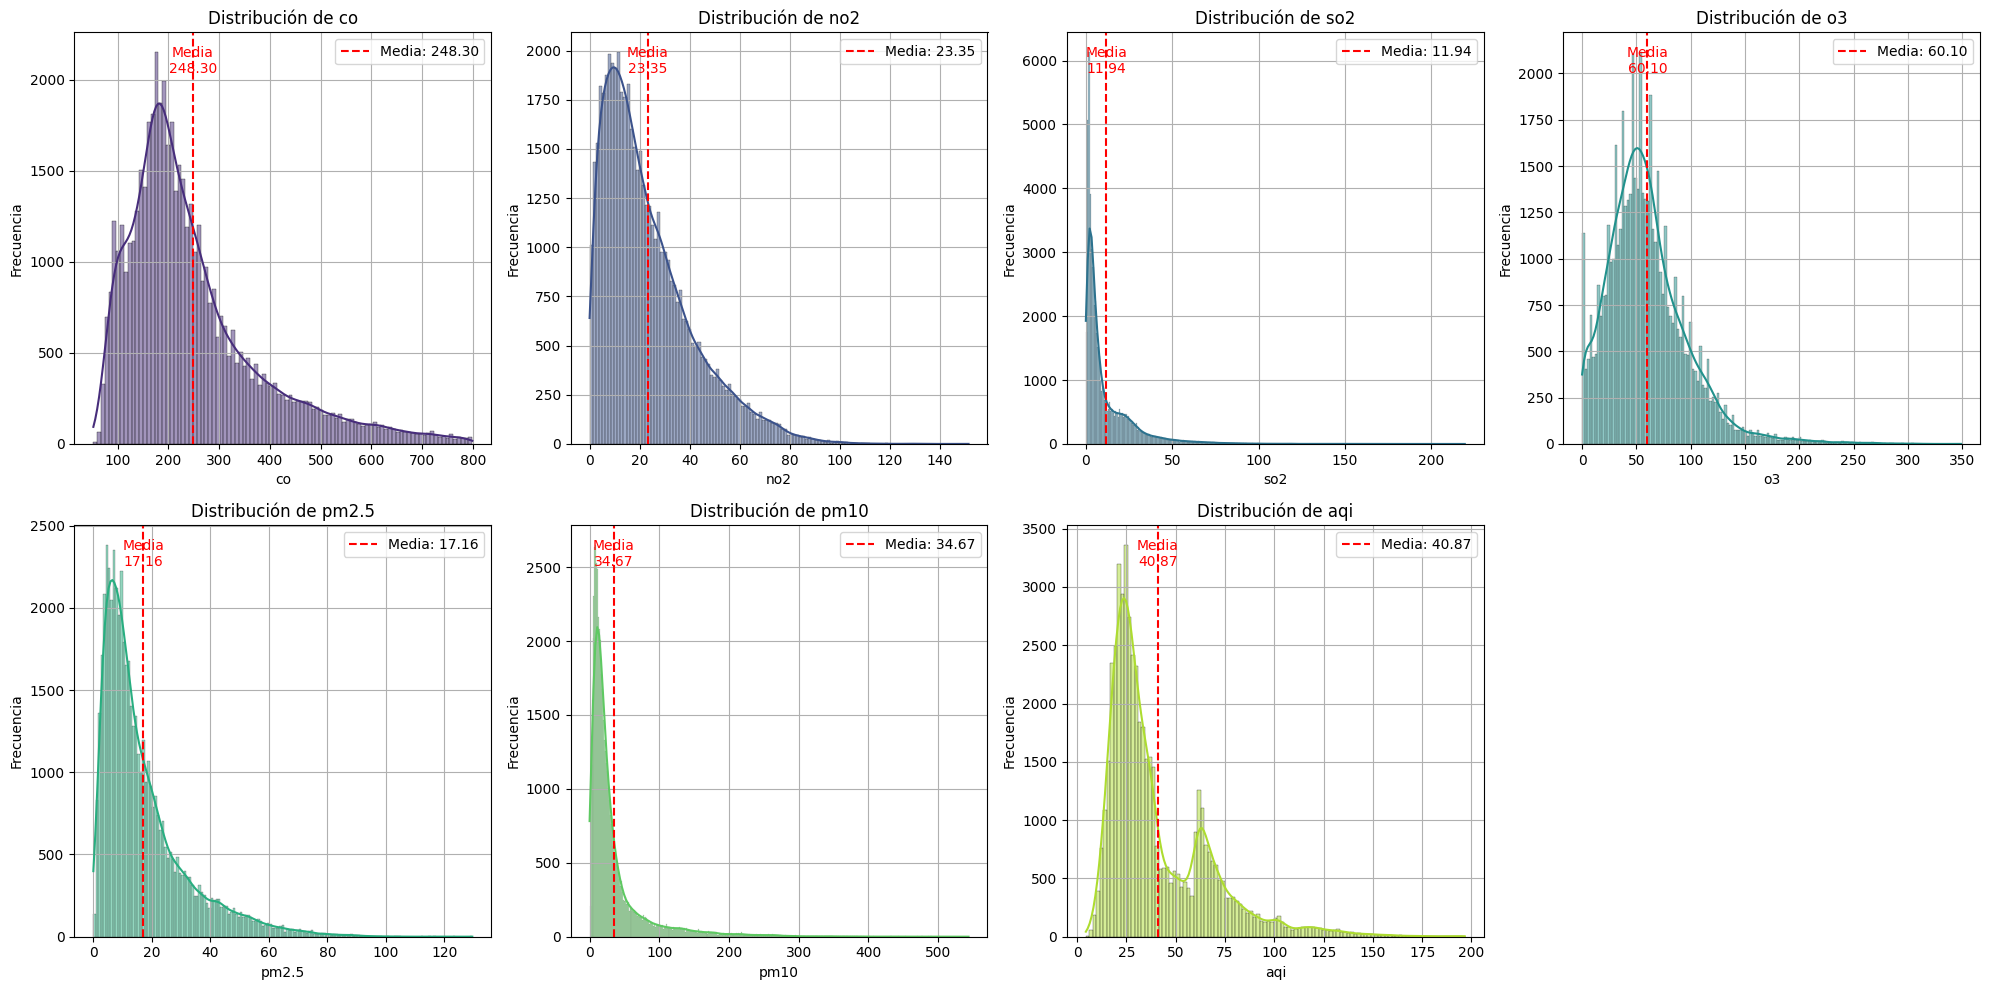

In [210]:
# generar un cor diferente para cada grafico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

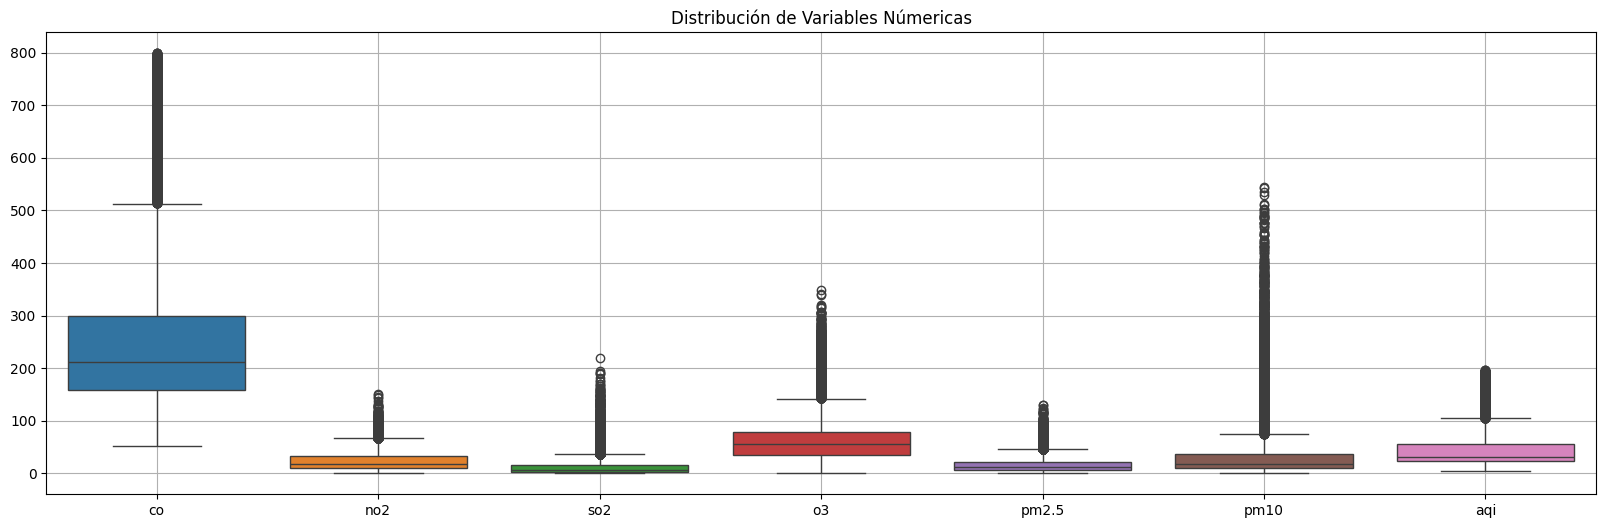

In [211]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

Clasificación y distribución de Indice de calidad de Aire:
aqi_category
Bueno                      37469
Moderado                   12423
Nocivo grupos sensibles     1867
Insalubre                    213
Muy insalubre                  0
Peligroso                      0
Name: count, dtype: int64


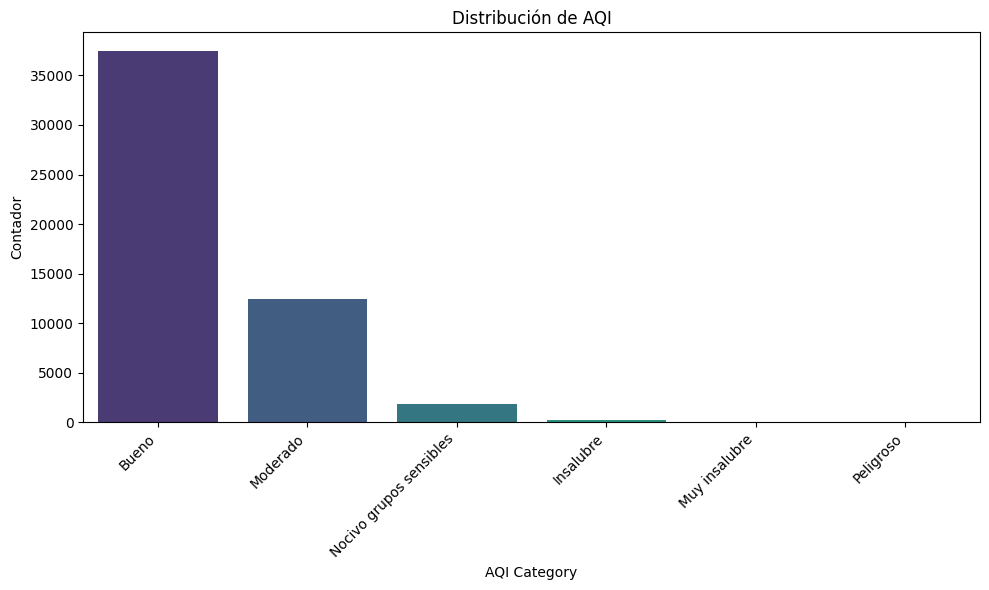

In [207]:
# Definición de la estructura para categorizar la columna 'aqi'
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Bueno', 'Moderado', 'Nocivo grupos sensibles', 'Insalubre', 'Muy insalubre', 'Peligroso']

# 2. se crea una categoria para aqi
df_1['aqi_category'] = pd.cut(df_1['aqi'], bins=bins, labels=labels, right=True)

# 3. Calculate and print the value counts for each category
print("Clasificación y distribución de Indice de calidad de Aire:")
print(df_1['aqi_category'].value_counts())

# 4. Create a countplot of the categorical 'aqi' column to visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='aqi_category', palette='viridis')
plt.title("Distribución de AQI")
plt.xlabel("AQI Category")
plt.ylabel("Contador")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

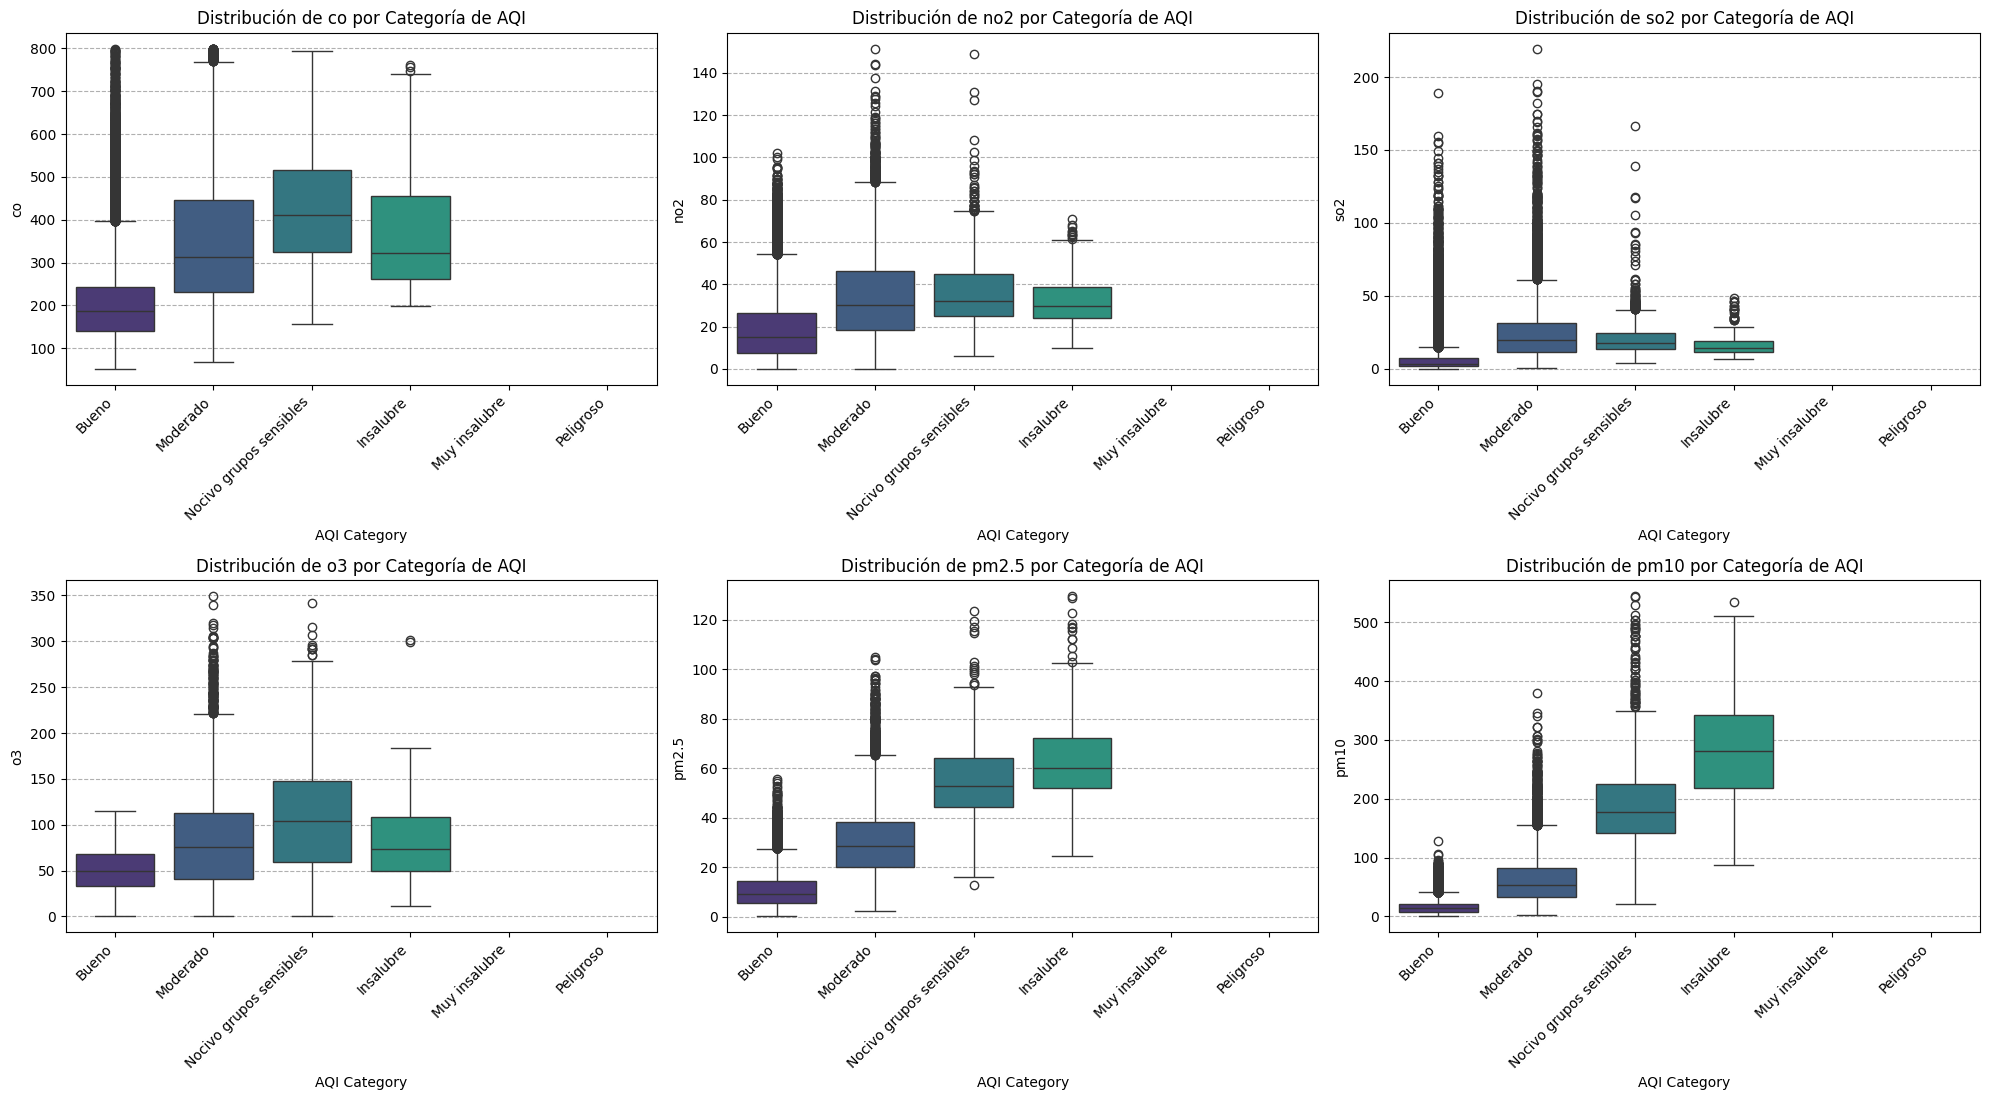

In [213]:
# Get numerical columns after dropping 'co2' and exclude 'aqi'
num_cols = df_1.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col != 'aqi']

plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_1, x='aqi_category', y=col, palette='viridis')
    plt.title(f"Distribución de {col} por Categoría de AQI")
    plt.xlabel("AQI Category")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

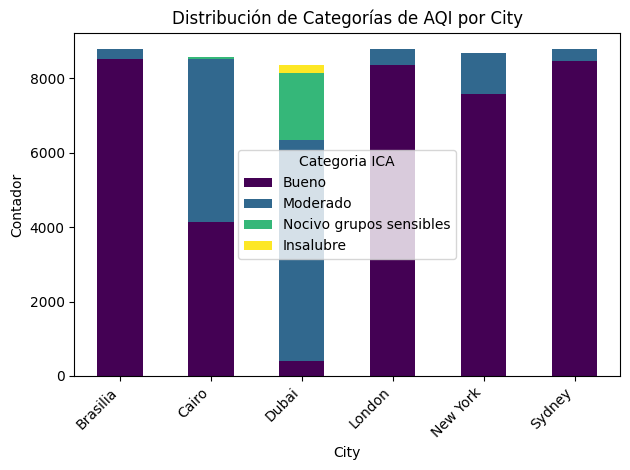

In [212]:
# Visualizacion de la calidad del aire por ciudad
cat_cols = ['city']

for col in cat_cols:
    plt.figure(figsize=(20, 6))
    ct = pd.crosstab(df_1[col], df_1['aqi_category'])
    ct.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f"Distribución de Categorías de AQI por {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Contador")
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Categoria ICA')
    plt.tight_layout()
    plt.show()

# 2.- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).

In [223]:
# Variables categóricas y numéricas
cat_cols = df_1.select_dtypes(include=['object']).columns.tolist()
num_cols = df_1.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: ['date', 'city']

Variables numéricas: ['co', 'no2', 'so2', 'o3', 'pm2.5', 'pm10', 'aqi']


In [225]:
# Variables numéricas
num_features = ['co', 'no2', 'so2', 'o3', 'pm2.5', 'pm10']

# Variables categóricas
cat_features =  ['date', 'city']

In [226]:
# Features finales
X = df_1[num_features + cat_features]
y = df_1['aqi']

In [227]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [228]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [229]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Regresion Lineal**

In [230]:
# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [231]:
# Entrenar
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['co', 'no2', 'so2', 'o3',
                                                   'pm2.5', 'pm10']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['date', 'city'])])),
                ('regressor', LinearRegression())])

In [232]:
# Evaluar
score = pipeline.score(X_test, y_test)

In [233]:
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")

MSE: 147.96
RMSE: 12.16
R^2: 0.788


Árbol desición

In [239]:
# Preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [240]:
# Pipeline con DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42)) # Cambiado a DecisionTreeRegressor
])

In [241]:
# Entrenar el modelo de Árbol de Decisión
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['co', 'no2', 'so2', 'o3',
                                                   'pm2.5', 'pm10']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['date', 'city'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [242]:
# Predecir en test
y_pred = pipeline.predict(X_test)

In [243]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 107.46
RMSE: 10.37


# 3.- Justificar la elección del problema y explicar por qué es relevante y desafiante.

Genera un plan de análisis exploratorio de datos (EDA) para un modelo de clasificación, incluyendo la identificación de la variable objetivo, el análisis del desbalance de clases, la visualización de relaciones entre características y la variable objetivo (numéricas y categóricas), y un resumen de hallazgos específicos para clasificación.

## Identificar la variable objetivo (clase)

Confirmar cuál columna en tu dataset representa la clase que quieres predecir.


Con base en los pasos anteriores del cuaderno, el usuario ya ha definido las características (X) y la variable objetivo (y) para una tarea de regresión, donde el objetivo es "CO2". Sin embargo, la subtarea actual solicita confirmar la variable objetivo para un modelo de clasificación. Necesito examinar las columnas disponibles y sus tipos de datos para determinar qué columna podría ser un objetivo adecuado para la clasificación, lo que generalmente implica predecir categorías o valores discretos. La columna ICA, que representa el Índice de Calidad del Aire, es una posible candidata, ya que podría categorizarse en diferentes niveles (p. ej., Bueno, Moderado, Insalubre).

Se han mostrado los nombres de las columnas y los tipos de datos. La columna aqi es de tipo flotante, pero representa un índice categorizable. Asumiré que "aqi" se utilizará como variable objetivo para una tarea de clasificación, donde los valores continuos del ICA deberán convertirse posteriormente en clases discretas. Guardaré el nombre de esta columna en una variable.


**Resumen de Hallazgos del EDA para Clasificación:**

Variables con relaciones aparentes con la categoría de AQI:

CO, NO2, SO2, O3, PM2.5 y PM10 muestran diferencias notables en su distribución a través de las categorías de AQI, sugiriendo que son características importantes para predecir la calidad del aire.
La variable 'city' también parece tener una relación con la categoría de AQI, ya que la distribución de las categorías de AQI varía entre ciudades.
Desbalance de Clases:

Se ha identificado un desbalance significativo en la variable objetivo 'aqi_category'. Las categorías 'Good' y 'Moderate' representan la gran mayoría de las observaciones, mientras que las categorías 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy' y 'Hazardous' tienen un número considerablemente menor de instancias o ninguna.
Implicaciones para el Modelado:

Las características numéricas (CO, NO2, SO2, O3, PM2.5, PM10) y la característica categórica 'city' son candidatas clave para la inclusión en el modelo de clasificación.
El desbalance de clases identificado es un desafío importante. Será necesario aplicar técnicas para manejar este desbalance, como sobremuestreo (e.g., SMOTE), submuestreo, o el uso de métricas de evaluación apropiadas para datos desbalanceados (e.g., F1-score, precisión y recall por clase), para evitar que el modelo esté sesgado hacia las clases mayoritarias.

**Conclusión:**

**Hallazgos Clave del Análisis de Datos**
- La variable objetivo para la clasificación se identifica como "aqi", la cual se categorizará en niveles discretos.
- Existe un desequilibrio de clases significativo en la variable objetivo categorizada ("aqi_category"), siendo las categorías "Bueno" y "Moderado" las más frecuentes, mientras que las categorías "Muy Insalubre" y "Peligroso" no presentan incidencias.
- Características numéricas como CO, NO₂, SO₂, O₃, PM₂ y PM₁₂ muestran distribuciones distintas en las diferentes categorías del ICA, lo que sugiere su importancia.
- La característica categórica "ciudad" también parece influir en la distribución de las categorías del ICA.

**Perspectivas o Próximos Pasos**
- El desequilibrio de clases identificado es un problema crítico que debe abordarse mediante técnicas como el sobremuestreo o el submuestreo durante el entrenamiento del modelo para evitar sesgos hacia las clases mayoritarias.
- Concéntrese en evaluar el modelo utilizando métricas adecuadas para conjuntos de datos desequilibrados, como la puntuación F1, la precisión y la recuperación de cada clase, en lugar de solo la precisión general.